In [50]:
import pandas as pd

In [51]:
shayneDf = pd.read_csv("/local/storage/rhlin_to_copy/CloneSeqExample/Mutations_Summary.txt", sep="\t")
sdf_a = shayneDf[shayneDf["Colony"] == "C"].sort_values(by = "Identifier")
sdf_a = sdf_a[ \
            ['ORF', 'Colony', 'Identifier', 'Desired Mutation Detected', \
             'Undesired Mutations Detected', 'Clean', 'Usable', 'Desired Mutation Score'] \
            ]
sdf_a = sdf_a.rename(columns = {"Desired Mutation Detected": "Status", \
                              "Undesired Mutations Detected": "Other Muts", "Usable": "Successful"}) \
                        .reset_index(drop=True)
sdf_a

,ORF,Colony,Identifier,Status,Other Muts,Clean,Successful,Desired Mutation Score
0,10002,C,10002_T743A_C,True,[],True,True,1.000066
1,10011,C,10011_G799A_C,True,[],True,True,0.998125
2,10016,C,10016_C1014G_C,True,[],True,True,1.002463
3,10037,C,10037_G1595C_C,True,[],True,True,1.016766
4,10037,C,10037_T1139G_C,True,[],True,True,0.945953
...,...,...,...,...,...,...,...,...
1654,9969,C,9969_G1228A_C,True,[],True,True,0.923568
1655,9970,C,9970_A377G_C,True,[],True,True,1.012101
1656,9989,C,9989_C596T_C,True,[],True,True,1.001226
1657,9990,C,9990_G1237A_C,True,[],True,True,1.096323


In [52]:
df_c = pd.read_csv(\
        "/local/storage/rhlin/ESP_7_output/ESP_7_C_trimmed_Summary.txt", \
        sep="\t", header = None) \
        .rename(columns = {0: "ORF", 1: "Colony", 2: "Identifier", 3: "Status", 4: "Other Muts", \
                           5: "Clean", 6: "Successful", 7: "Score"}) \
        .sort_values(by = "Identifier") \
        .reset_index(drop=True)
df_c

,ORF,Colony,Identifier,Status,Other Muts,Clean,Successful,Score
0,10002,C,10002_T743A_C,True,['10002_G6T'],False,False,-1.522884
1,10011,C,10011_G799A_C,True,['10011_G1317T'],False,False,-2.793117
2,10016,C,10016_C1014G_C,True,[],True,True,0.000000
3,10037,C,10037_G1595C_C,True,[],True,True,-0.259503
4,10037,C,10037_T1139G_C,True,[],True,True,-1.968386
...,...,...,...,...,...,...,...,...
1654,9969,C,9969_G1228A_C,True,[],True,True,-3.196436
1655,9970,C,9970_A377G_C,True,[],True,True,-1.820373
1656,9989,C,9989_C596T_C,True,['9989_C1242A'],False,False,-1.000000
1657,9990,C,9990_G1237A_C,True,[],True,True,-0.035991


In [53]:
df_wt = pd.read_csv(\
        "/local/storage/rhlin/ESP_7_output/ESP_7_WT_trimmed_Summary.txt", \
        sep="\t", header = None) \
        .rename(columns = {0: "ORF", 1: "Colony", 2: "Identifier", 3: "Status", 4: "Other Muts", \
                           5: "Clean", 6: "Successful", 7: "Score"}) \
        .sort_values(by = "Identifier") \
        .reset_index(drop=True)
df_wt

,ORF,Colony,Identifier,Status,Other Muts,Clean,Successful,Score
0,10002,W,10002_T743A_W,False,['10002_G6T'],False,False,-inf
1,10011,W,10011_G799A_W,False,['10011_G1317T'],False,False,-inf
2,10016,W,10016_C1014G_W,False,[],True,False,-inf
3,10037,W,10037_G1595C_W,False,[],True,False,-inf
4,10037,W,10037_T1139G_W,False,[],True,False,-inf
...,...,...,...,...,...,...,...,...
1654,9969,W,9969_G1228A_W,False,[],True,False,-inf
1655,9970,W,9970_A377G_W,False,[],True,False,-inf
1656,9989,W,9989_C596T_W,False,['9989_C1242A'],False,False,-inf
1657,9990,W,9990_G1237A_W,False,[],True,False,-744.440072


In [54]:
df_c["Identifier_new"] = df_c["Identifier"].apply(lambda x: x[0:-2])
df_wt["Identifier_new"] = df_wt["Identifier"].apply(lambda x: x[0:-2])
df_wt = df_wt.rename(columns = {"Other Muts": "Other Muts WT"})

In [55]:
df_merge = pd.merge(df_c, df_wt[["Identifier_new", "Other Muts WT"]].drop_duplicates(), on = ["Identifier_new"], how = "left")
df_merge["Other Muts"] = df_merge.apply(lambda row: list(set(eval(row["Other Muts"])) - set(eval(row["Other Muts WT"]))), axis = 1)

In [56]:
df_merge["Clean"] = df_merge["Other Muts"].apply(lambda x: len(x) == 0)

In [57]:
df_richard = df_merge.sort_values(by="Identifier")[["Identifier", "Status", "Other Muts", "Clean", "Successful"]]
df_richard

,Identifier,Status,Other Muts,Clean,Successful
0,10002_T743A_C,True,[],True,False
1,10011_G799A_C,True,[],True,False
2,10016_C1014G_C,True,[],True,True
3,10037_G1595C_C,True,[],True,True
4,10037_T1139G_C,True,[],True,True
...,...,...,...,...,...
1654,9969_G1228A_C,True,[],True,True
1655,9970_A377G_C,True,[],True,True
1656,9989_C596T_C,True,[],True,False
1657,9990_G1237A_C,True,[],True,True


In [58]:
df_shayne = sdf_a[["Identifier", "Status", "Other Muts", "Clean", "Successful"]]
df_shayne

,Identifier,Status,Other Muts,Clean,Successful
0,10002_T743A_C,True,[],True,True
1,10011_G799A_C,True,[],True,True
2,10016_C1014G_C,True,[],True,True
3,10037_G1595C_C,True,[],True,True
4,10037_T1139G_C,True,[],True,True
...,...,...,...,...,...
1654,9969_G1228A_C,True,[],True,True
1655,9970_A377G_C,True,[],True,True
1656,9989_C596T_C,True,[],True,True
1657,9990_G1237A_C,True,[],True,True


In [70]:
df_compare = pd.merge(df_richard, df_shayne, on = ["Identifier"], how = "left")
df_compare["Other Muts_y"] = df_compare["Other Muts_y"].apply(lambda x: eval(x))
df_compare

,Identifier,Status_x,Other Muts_x,Clean_x,Successful_x,Status_y,Other Muts_y,Clean_y,Successful_y
0,10002_T743A_C,True,[],True,False,True,[],True,True
1,10011_G799A_C,True,[],True,False,True,[],True,True
2,10016_C1014G_C,True,[],True,True,True,[],True,True
3,10037_G1595C_C,True,[],True,True,True,[],True,True
4,10037_T1139G_C,True,[],True,True,True,[],True,True
...,...,...,...,...,...,...,...,...,...
1654,9969_G1228A_C,True,[],True,True,True,[],True,True
1655,9970_A377G_C,True,[],True,True,True,[],True,True
1656,9989_C596T_C,True,[],True,False,True,[],True,True
1657,9990_G1237A_C,True,[],True,True,True,[],True,True


In [71]:
status = df_compare[df_compare["Status_x"] != df_compare["Status_y"]]

In [72]:
len(status)

20

In [73]:
def parse_variants(x):
    return sorted([item.split("_")[1] for item in x])
df_compare["Other Muts_x"] = df_compare["Other Muts_x"].apply(parse_variants)
df_compare["Other Muts_y"] = df_compare["Other Muts_y"].apply(lambda x: sorted(x))

In [81]:
def removeIndels(otherMuts):
    return [x for x in otherMuts if not "Gap" in x and not "Missing" in x]
df_compare["Other Muts_y"] = df_compare["Other Muts_y"].apply(removeIndels)

In [82]:
ot_comparison = df_compare[df_compare["Other Muts_x"] != df_compare["Other Muts_y"]]

In [83]:
ot_comparison

,Identifier,Status_x,Other Muts_x,Clean_x,Successful_x,Status_y,Other Muts_y,Clean_y,Successful_y
149,116_G531T_C,True,[G627C],False,False,True,[],True,True
232,12598_G349A_C,True,"[A389C, A404G, C412T, G394T, G396A]",False,False,True,"[G394T, G396A]",False,False
233,12598_G635A_C,True,"[A389C, A404G, C412T, G394T, G396A]",False,False,True,"[G394T, G396A]",False,False
238,12855_A464C_C,True,[],True,True,True,"[T212C, T275C]",False,False
298,1386_A683C_C,True,[C263T],False,False,True,[],False,False
299,1386_C259T_C,True,[C263T],False,False,False,[],False,False
300,1386_C622G_C,True,[C263T],False,False,True,[],False,False
301,1386_G406A_C,True,[C263T],False,False,True,[],False,False
302,1386_G967A_C,True,[C263T],False,False,True,[],False,False
303,1386_T187G_C,True,[C263T],False,False,True,[],False,False


In [76]:
import matplotlib.pyplot as plt

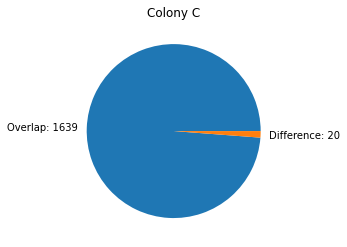

In [77]:
title = plt.title("Colony C")
pie_chart = plt.pie(x=[1639, 20], labels=["Overlap: 1639", "Difference: 20"])

In [84]:
len(ot_comparison)

55

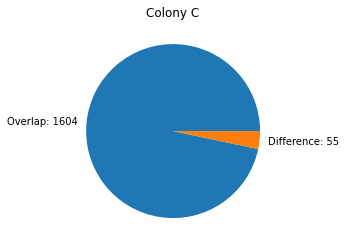

In [85]:
title = plt.title("Colony C")
pie_chart = plt.pie(x=[1604, 55], labels=["Overlap: 1604", "Difference: 55"])